### Importing Libraries

In [3]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

### Loading Model

In [8]:
model = tf.keras.models.load_model('trained_model.keras')

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                  

### Visualizing Single Image Of Test Set

In [13]:
!pip install opencv-python

  Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl (39.5 MB)


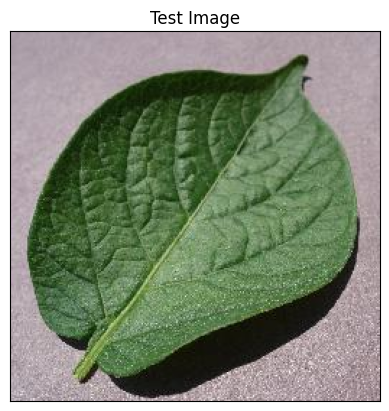

In [41]:
import cv2
image_path = "test/test/PotatoHealthy2.JPG"
#Reading Image
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Convert BGR to RGB

plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

## Testing Model

In [44]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr]) ##convert single img to batch
print(input_arr.shape)

(1, 128, 128, 3)


In [46]:
prediction = model.predict(input_arr)
prediction,prediction.shape

1/1 [==============================] - 0s 35ms/step


(array([[1.4128547e-11, 1.0136173e-08, 3.1769700e-12, 7.5002686e-06,
         4.0442836e-09, 3.3773662e-09, 9.0292292e-07, 8.2193240e-15,
         2.2033495e-15, 4.1797417e-14, 1.3771656e-14, 2.8136381e-14,
         1.9618782e-13, 6.0624681e-15, 3.0637891e-15, 2.8146474e-10,
         1.0106080e-11, 7.1598427e-10, 2.0327452e-08, 2.4366984e-05,
         2.7278642e-09, 7.9849110e-07, 9.9996626e-01, 4.6291565e-10,
         7.5728126e-09, 1.7675932e-15, 4.3293070e-14, 3.6310641e-09,
         3.9249758e-14, 1.1185527e-09, 5.1500620e-10, 7.8917097e-13,
         1.3054259e-12, 7.3107917e-12, 8.0672843e-11, 8.7164149e-14,
         1.2888164e-14, 1.3851537e-13]], dtype=float32),
 (1, 38))

In [48]:
result_index = np.argmax(prediction)
result_index

22

In [50]:
class_name = ['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

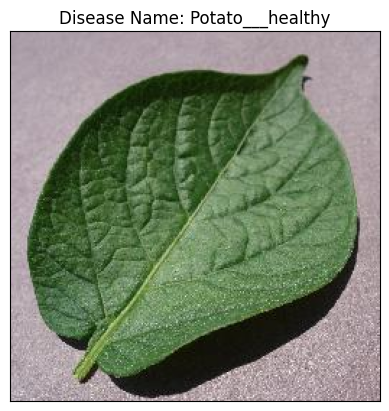

In [52]:
#Displaying Result of Disease Prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()